In [177]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#get selected features (top 10 by Fisher's criterion) from 00_EDA.ipynb
%store -r features_dwt_topten_8 features_wang_topten_8 features_jones_topten_8

In [178]:
#return intersection of top 10 features with dwt and jones methods
print((features_dwt_topten_8[:-1]).intersection(set(features_wang_topten_8[:-1])))

Index(['slope_6', 'slope_29', 'slope_4', 'slope_17', 'slope_25', 'slope_14'], dtype='object')


In [179]:
ftnum_dwt_topten_8 = [int(ft.replace('slope_', '')) for ft in features_dwt_topten_8[:-1]]
ftnum_wang_topten_8 = [int(ft.replace('slope_', '')) for ft in features_wang_topten_8[:-1]]
ftnum_jones_topten_8 = [int(ft.replace('slope_', '')) for ft in features_jones_topten_8[:-1]]

print(ftnum_dwt_topten_8)
print(ftnum_wang_topten_8)
print(ftnum_jones_topten_8)

[6, 29, 4, 11, 28, 17, 20, 24, 25, 14]
[6, 27, 29, 17, 25, 21, 14, 4, 26, 19]
[6, 28, 20, 5, 24, 23, 29, 22, 8, 16]


In [180]:
sample = pd.read_csv(os.path.join(os.getcwd(), '8-7-02/Cancer/Ovarian Cancer daf-0601.csv'))

In [181]:
def mz_ratio_windows(x):
    return 1024 + 500*(x-1)

In [182]:
mz_dwt_topten_8 = [mz_ratio_windows(x) for x in ftnum_dwt_topten_8]
mz_wang_topten_8 = [mz_ratio_windows(x) for x in ftnum_wang_topten_8]
mz_jones_topten_8 = [mz_ratio_windows(x) for x in ftnum_jones_topten_8]

print(mz_dwt_topten_8)
print(mz_wang_topten_8)
print(mz_jones_topten_8)

[3524, 15024, 2524, 6024, 14524, 9024, 10524, 12524, 13024, 7524]
[3524, 14024, 15024, 9024, 13024, 11024, 7524, 2524, 13524, 10024]
[3524, 14524, 10524, 3024, 12524, 12024, 15024, 11524, 4524, 8524]


In [183]:
#return intersection of top 10 features'  with dwt and jones methods
s1 = set(mz_dwt_topten_8).intersection(set(mz_wang_topten_8))
s2 = s1.intersection(set(ftnum_jones_topten_8))

print(s1)
print(s2)

{9024, 13024, 7524, 3524, 15024, 2524}
set()


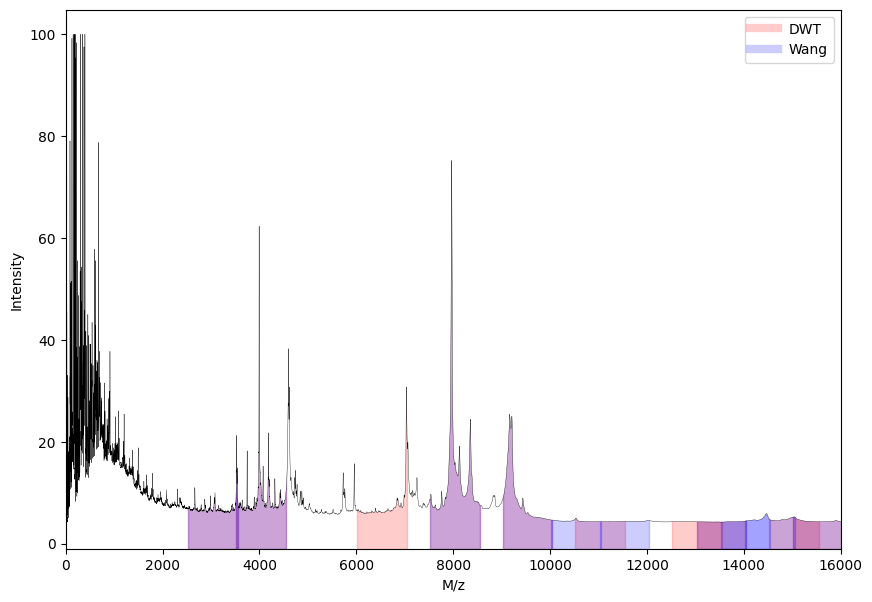

In [184]:
plt.figure(figsize=(10, 7))

plt.plot(sample['M/Z'], sample['Intensity'], color='black', linewidth=0.25)
plt.xlabel('M/z')
plt.ylabel('Intensity')
plt.xlim(0, 16000)

[plt.axvspan(mz_dwt_topten_8[i],mz_dwt_topten_8[i]+1024, ymin=0, ymax=0.80, color='red', alpha=0.20) for i in range(len(mz_dwt_topten_8))]

[plt.axvspan(mz_wang_topten_8[i],mz_wang_topten_8[i]+1024, ymin=0, ymax=0.80, color='blue', alpha=0.20) for i in range(len(mz_wang_topten_8))]

plt.fill_between(sample['M/Z'], sample['Intensity'], 100, facecolor='white', alpha=1)

custom_lines = [Line2D([0], [0], color='red', alpha=0.2, lw=6),
                Line2D([0], [0], color='blue', alpha=0.2, lw=6)]

plt.legend(custom_lines, ['DWT', 'Wang'])

plt.show()

## Scratchpad

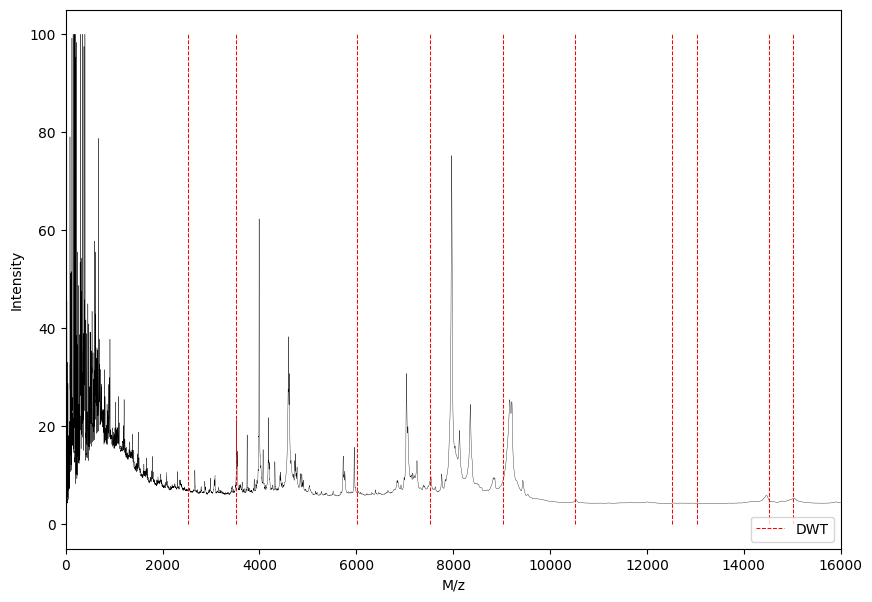

In [185]:
plt.figure(figsize=(10, 7))

plt.plot(sample['M/Z'], sample['Intensity'], color='black', linewidth=0.25)
plt.xlabel('M/z')
plt.ylabel('Intensity')
plt.xlim(0, 16000)

#plt.axvline(x = 2000, color = 'b', label = 'axvline - full height')
plt.vlines(x = mz_dwt_topten_8, ymin = 0, ymax=100, linestyles='dashed', color='red', label='DWT', linewidth=0.75)
#plt.vlines(x = mz_wang_topten_8, ymin = 0, ymax=100, linestyles='dotted', color='darkblue', label='Wang', linewidth=0.75)
#plt.vlines(x = mz_jones_topten_8, ymin = 0, ymax=100, linestyles='dashdot', color='green', label='Jones')

plt.legend(loc='lower right')